In [1]:
import os  # Operating System module for interacting with the file system
import numpy as np  # importing for numerical operations and array manipulations
import pandas as pd  # importing for data manipulation and analysis, especially with tabular data
import librosa   # importing for audio analysis and processing
import matplotlib.pyplot as plt  # importing for creating visualizations

In [2]:
from pydub import AudioSegment  # importing for audio file handling, conversion, and basic audio processing
import warnings  # Warnings library to manage and suppress warnings during execution
warnings.filterwarnings('ignore')  
import IPython.display as ipd  # for displaying for audio playback using 'ipd.Audio'
import gc  # control the garbage collector or collect unreferenced objects.

**Datasourcing:**

In [3]:
# Define language directories for different languages 
hindi = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/'
bengali = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali/'
gujarati = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/'
kannada = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Kannada/'
malayalam = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Malayalam/'
marathi = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/'
punjabi = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/'
tamil = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil/'
telugu = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/'
urdu = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/'
work_dir = '/kaggle/working/'

**Data Validation**


In [4]:
# Function to validate audio files
def validate_audio(files):
    # List to store validated audio files
    validated_files = []

    # Loop through each file in the provided list of files
    for file in files:
        try:
            audio, _ = librosa.load(file, sr=None) # Attempt to load the audio file using librosa
            # Verify if the audio file is clear (free from significant noise or distortion)
            # Check if the maximum absolute value of the audio samples is greater than 0.01
            
            if np.max(np.abs(audio)) > 0.01: # If the condition is met, add the file to the list of validated files
                validated_files.append(file)     
        except (librosa.util.exceptions.ParameterError, FileNotFoundError, EOFError, Exception): 
            # Handle potential exceptions that may occur during the process
            # If an exception occurs, just move on to the next file without raising an error
            pass    
    # Return the list of validated audio files
    return validated_files



# Function to confirm languages of audio files
def confirm_languages(files, languages):
    confirmed_files = [] # List to store confirmed audio files based on specified languages
    for file in files: # Loop through each file in the provided list of files
        for lang in languages:         # Loop through each language in the specified list of languages
            # Check if the lowercase representation of the language is present in the lowercase file name
            if lang.lower() in file.lower():
                # If the language is found in the file name, add the file to the list of confirmed files
                confirmed_files.append(file)
                # Break out of the inner loop since the language has been confirmed for this file
                break
    
    # Return the list of confirmed audio files
    return confirmed_files


In [5]:
language_directories = [hindi,
bengali,
gujarati,
kannada,
malayalam,
marathi,
punjabi,
tamil,
telugu,
urdu]

filenames= ['1.mp3', '10.mp3', '100.mp3', '1000.mp3', '10000.mp3']

for lang_directory in language_directories:
    for filename in filenames:
        audio_file_path = os.path.join(lang_directory, filename)
        
# Validate audio files
validated_files = validate_audio(audio_file_path)

# Confirm that the recordings are indeed in the specified Indian languages
confirmed_files = confirm_languages(validated_files, ['hindi', 'bengali', 'gujarati', 'kannada', 'malayalam', 'marathi', 'punjabi', 'tamil', 'telugu', 'urdu'])

# Remove any irrelevant or corrupted audio files
cleaned_files = confirmed_files

 **Data Cleaning:**

In [6]:
gc.collect() #Explicitly trigger garbage collection to free up memory

24821

In [7]:
#nomalize volume 
def compute_mfcc(audio_path, n_mfcc=13):
    # Load audio file using librosa
    y, sr = librosa.load(audio_path, sr=None)
    
    # Compute MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    return np.mean(mfcc, axis=1)

def normalize_audio(input_path, output_path, target_mfcc_mean):
    # Load audio file
    audio = AudioSegment.from_file(input_path)
    
    # Compute MFCC features for the input audio
    input_mfcc_mean = compute_mfcc(input_path)
    
    # Compute the gain to normalize the MFCC means
    gain = 10 ** ((target_mfcc_mean - np.mean(input_mfcc_mean)) / 20)
    
    # Apply the gain to normalize the volume
    normalized_audio = audio.apply_gain(gain)
    
    # Export the normalized audio to a new file
    normalized_audio.export(output_path, format="wav")

def normalize_directory(input_directory, output_directory, target_mfcc_mean):
    # Ensure the output directory exists
    os.makedirs(output_directory, exist_ok=True)
    
    # Loop through all audio files in the input directory
    for filename in os.listdir(input_directory):
        if filename.endswith(".mp3"):  # Adjust based on your file format
            input_path = os.path.join(input_directory, filename)
            output_path = os.path.join(output_directory, filename)
            
            # Normalize the audio using MFCC and save to the output directory
            normalize_audio(input_path, output_path, target_mfcc_mean)
            print(f"Normalized: {filename}")

if __name__ == "__main__":
    # Specify input and output directories
    input_directory = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset"
    output_directory = "/kaggle/working/"

    # Specify the target MFCC mean for normalization
    target_mfcc_mean = -20.0  # Adjust as needed

    # Normalize the volume of audio files in the input directory using MFCC
    normalize_directory(input_directory, output_directory, target_mfcc_mean)


In [8]:
filenames= ['1.mp3', '10.mp3', '100.mp3', '1000.mp3', '10000.mp3']
for lang_directory in language_directories:
    for filename in filenames:
        # Construct the full path to the audio file by joining the language directory and the filename
        audio_file_path = os.path.join(lang_directory, filename)

In [9]:

#data variable stores the audio signal as a one-dimensional NumPy array.
#samplerate variable stores the sampling rate (number of samples per second) of the audio file.
data1, samplerate1 = librosa.load(hindi+filename)
data2, samplerate2 = librosa.load(bengali+filename)
data3, samplerate3 = librosa.load(kannada+filename)
data4, samplerate4 = librosa.load(malayalam+filename)
data5, samplerate5 = librosa.load(marathi+filename)
data6, samplerate6 = librosa.load(gujarati+filename)
data7, samplerate7 = librosa.load(punjabi+filename)
data8, samplerate8 = librosa.load(tamil+filename)
data9, samplerate9 = librosa.load(urdu+filename)
data10, samplerate10 = librosa.load(telugu+filename)

In [10]:
#single display of audio
ipd.display(ipd.Audio(hindi+filename))

In [11]:
#checking the shape of the data 
data= list([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10])
for i in data:
    y= i.shape
    print(y)

(110360,)
(110328,)
(109831,)
(109831,)
(109831,)
(109752,)
(109752,)
(110040,)
(109831,)
(110328,)


In [12]:
#single audio file 
filename_b = '10000.mp3'
ipd.Audio(gujarati+filename_b)

In [13]:
#multiple filename can be accessed to load audio data 
language_directories = [hindi,
bengali,
gujarati,
kannada,
malayalam,
marathi,
punjabi,
tamil,
telugu,
urdu]

filenames= ['10000.mp3', '10001.mp3', '10002.mp3', '10003.mp3', '10004.mp3']

for lang_directory in language_directories:
    for filename in filenames:
        audio_file_path = os.path.join(lang_directory, filename)
        
                # Print a message indicating that the audio file is being played
        print(f"Playing audio: {audio_file_path}")
        
        # Display and play the audio using IPython's Audio module
        ipd.display(ipd.Audio(lang_directory+filename))

Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/10004.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali/10004.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/10004.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Kannada/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Kannada/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Kannada/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Kannada/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Kannada/10004.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Malayalam/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Malayalam/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Malayalam/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Malayalam/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Malayalam/10004.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/10004.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/10004.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil/10004.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/10004.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/10000.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/10001.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/10002.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/10003.mp3


Playing audio: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/10004.mp3


**Data visualisation** 


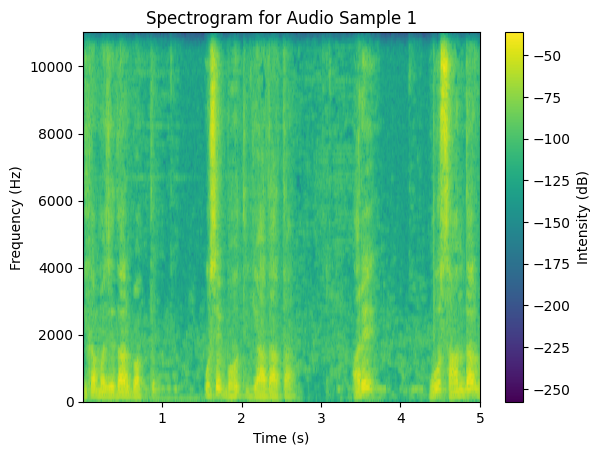

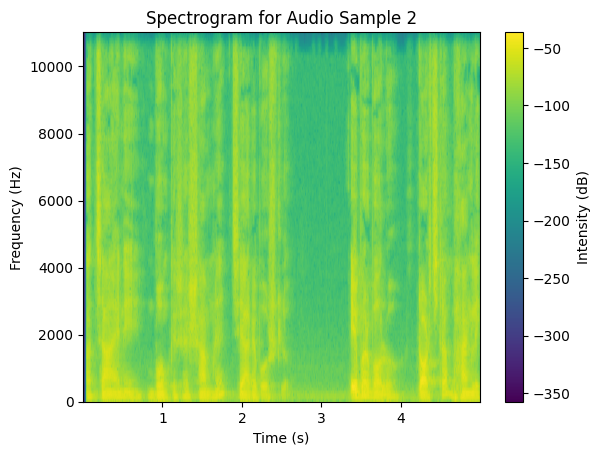

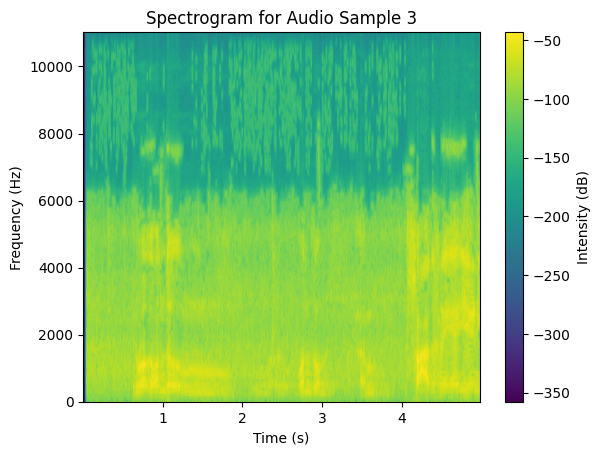

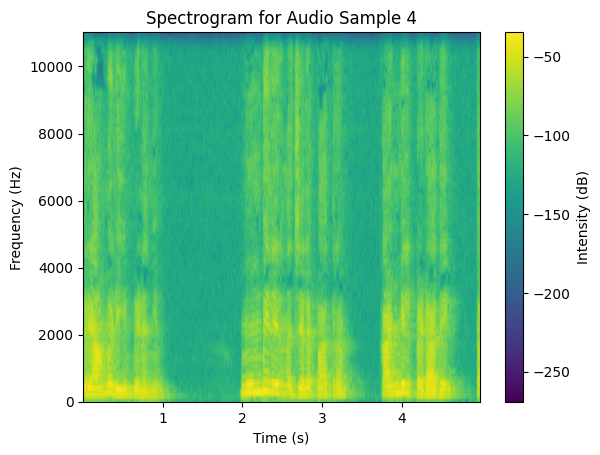

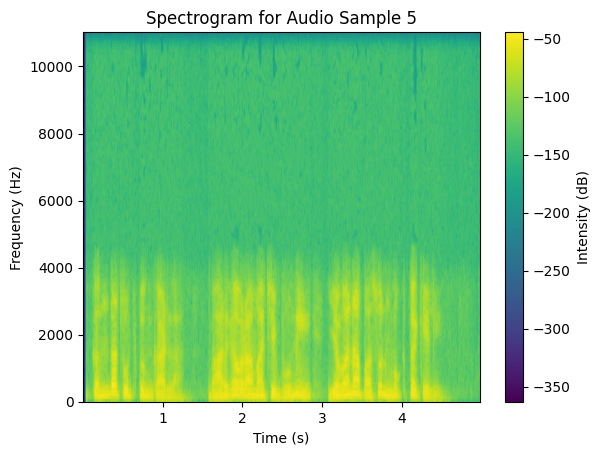

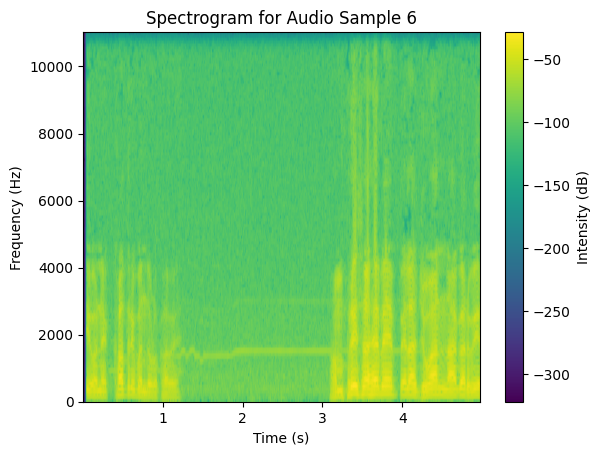

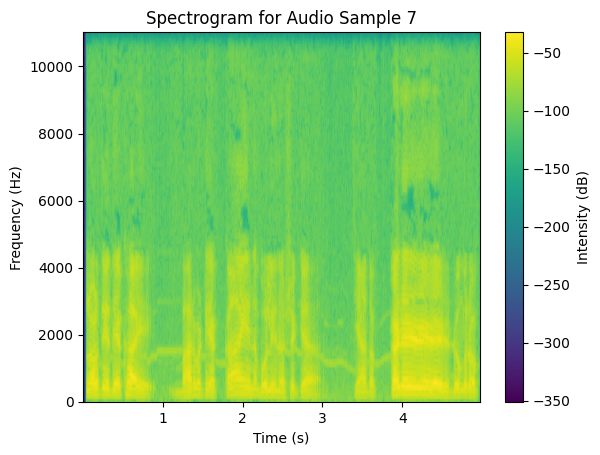

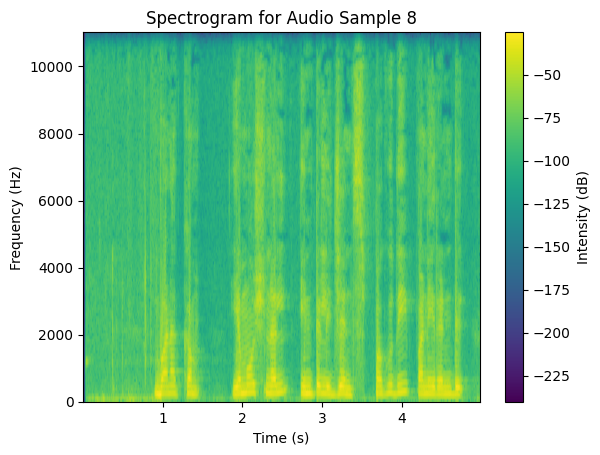

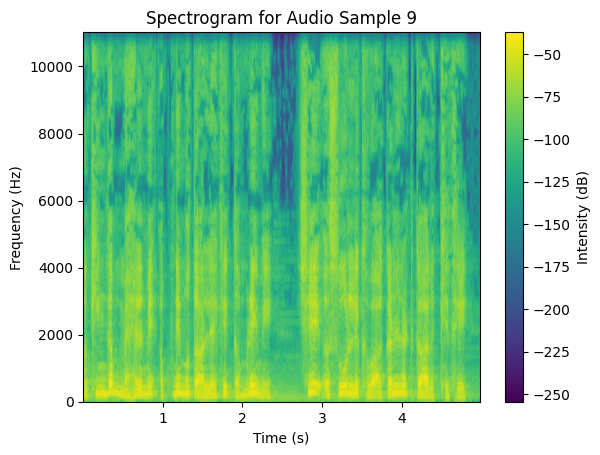

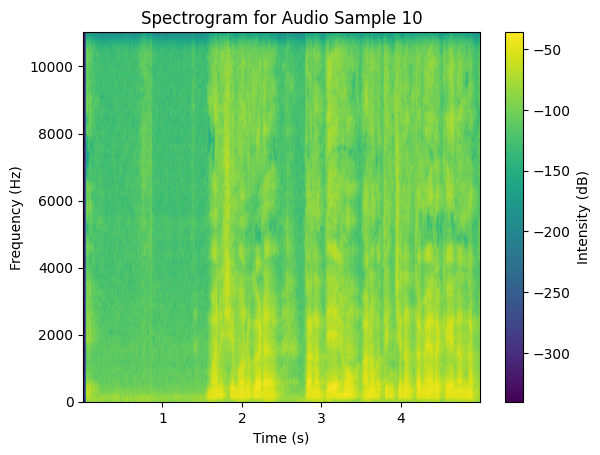

In [14]:
# Assuming samplerate and data for each audio langugage 
samplerates = [samplerate1, samplerate2, samplerate3, samplerate4, samplerate5,
               samplerate6, samplerate7, samplerate8, samplerate9, samplerate10]
data = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

# Plotting spectrograms for each audio sample
for i in range(len(data)):
    Pxx, freqs, bins, im = plt.specgram(data[i], Fs=samplerates[i]) 
    #specgram computes the windowed discrete-time Fourier transform of a signal using a sliding window
    # bin is time slices corresponding to the columns 
    #freqs is frequencies corresponding to the rows
    #im receives the matplotlib.image
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.title(f'Spectrogram for Audio Sample {i+1}')
    plt.colorbar(label='Intensity (dB)')  # Optional: Add a colorbar for intensity
    plt.show()

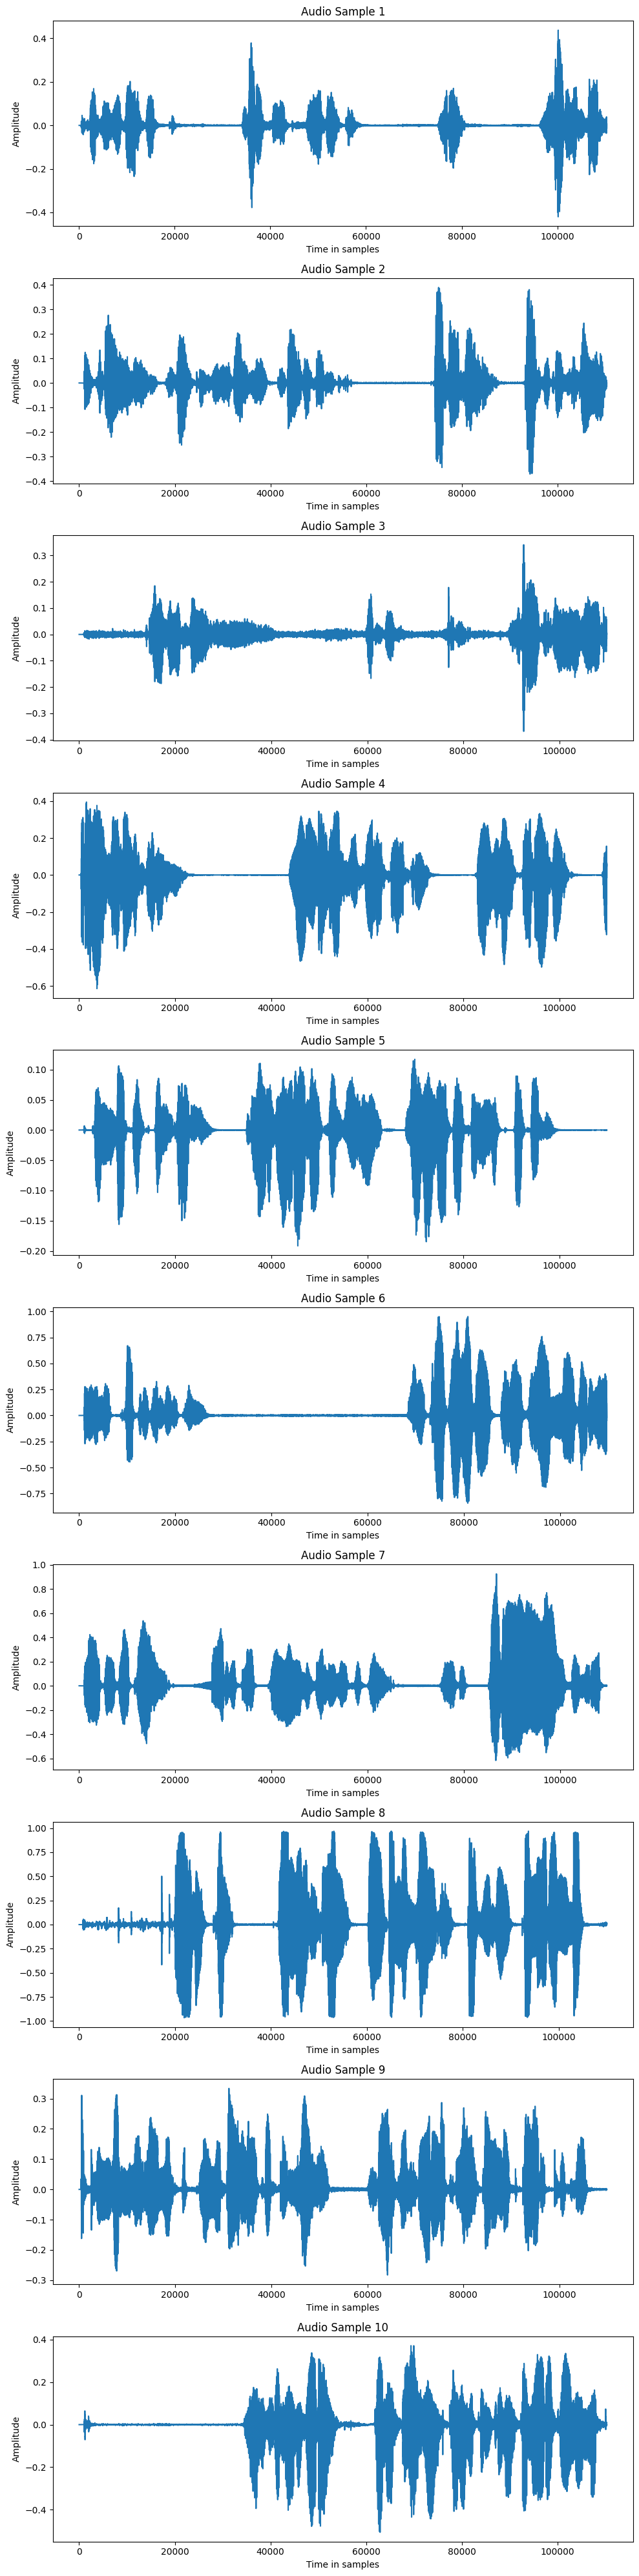

In [15]:
data = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

# Set up subplots
fig, axes = plt.subplots(len(data), 1, figsize=(10, 4 * len(data)))

# Plot each audio sample
for i in range(len(data)):
    axes[i].plot(data[i])
    axes[i].set_ylabel('Amplitude')
    axes[i].set_xlabel('Time in samples')
    axes[i].set_title(f'Audio Sample {i + 1}')

plt.tight_layout()
plt.show()

# **Data Labeling and Classification:**

In [16]:
#manually taken dataset 
from sklearn.model_selection import train_test_split

path1= '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi'
path2= '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali'
path3= '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu'
path4= '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi'
path5= '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil'
path6 = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati'
path7 = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Kannada'
path8 = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Malayalam'
path9 = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi'
path10 = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu'

dataset = {
    'file_path': [path1, path2, path3, path4, path5, path6, path7, path8, path9, path10],
    'language': ['Hindi', 'Bengali', 'Telugu', 'Marathi', 'Tamil', 'gujarati', 
                 'kannada', 'malayalam', 'punjabi','urdu'],
    'gender': ['Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female'],
    'age_group': ['Adult', 'Teen','Adult', 'Teen','Adult', 'Teen','Adult', 'Teen','Adult', 'Teen'],
    'emotion': ['Happy', 'Neutral', 'Sad','Happy', 'Neutral', 'Sad','Happy', 'Neutral', 'Sad', 'Happy']
}

df = pd.DataFrame(dataset)

# Spliting the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Training Dataset Structure:")
print(train_df)

print("\nTesting Dataset Structure:")
print(test_df)


Training Dataset Structure:
                                           file_path   language  gender  \
5  /kaggle/input/audio-dataset-with-10-indian-lan...   gujarati  Female   
0  /kaggle/input/audio-dataset-with-10-indian-lan...      Hindi    Male   
7  /kaggle/input/audio-dataset-with-10-indian-lan...  malayalam  Female   
2  /kaggle/input/audio-dataset-with-10-indian-lan...     Telugu    Male   
9  /kaggle/input/audio-dataset-with-10-indian-lan...       urdu  Female   
4  /kaggle/input/audio-dataset-with-10-indian-lan...      Tamil    Male   
3  /kaggle/input/audio-dataset-with-10-indian-lan...    Marathi  Female   
6  /kaggle/input/audio-dataset-with-10-indian-lan...    kannada    Male   

  age_group  emotion  
5      Teen      Sad  
0     Adult    Happy  
7      Teen  Neutral  
2     Adult      Sad  
9      Teen    Happy  
4     Adult  Neutral  
3      Teen    Happy  
6     Adult    Happy  

Testing Dataset Structure:
                                           file_path language